In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [3]:
reference = pd.read_csv("data/reference_without_add2.csv")
len(reference) 

100

Text(0.5, 0, 'Index')

Text(0, 0.5, 'FuelConsumption')

Text(0.5, 1.0, 'FuelConsumption')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'CO2Emission')

Text(0.5, 1.0, 'CO2Emission')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'TravelTime')

Text(0.5, 1.0, 'TravelTime')

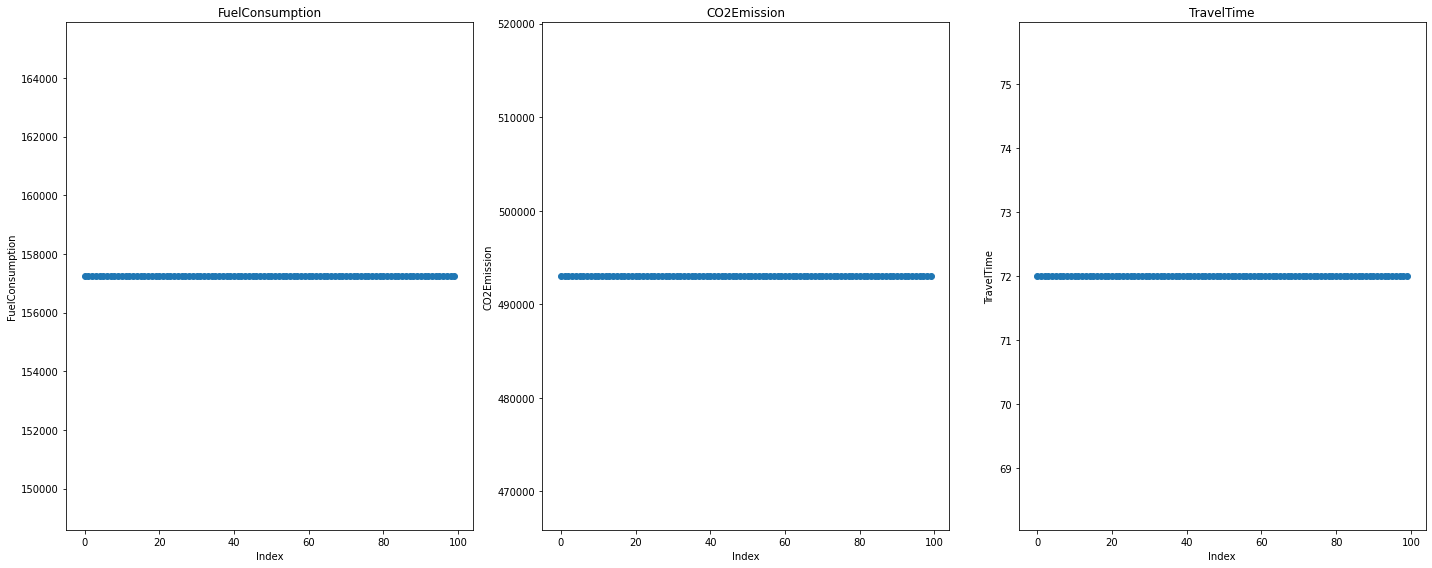

In [4]:
cols = ['FuelConsumption','CO2Emission','TravelTime']
# Création de scatter plots pour chaque colonne
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

for i, col in enumerate(cols):
    axs[i].scatter(reference.index, reference[col])
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel(col)
    axs[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

In [5]:
# reference values
reference_values = reference.iloc[0]
# Références pour les comparaisons
travel_reference = reference_values["TravelTime"]
fuel_reference = reference_values["FuelConsumption"]
co2_reference = reference_values["CO2Emission"]

In [103]:
travel_reference
fuel_reference

72.0

157245.92011548087

### Nos donnees

In [6]:
def filter_by_median(df: pd.DataFrame, column:str):
    median = df[column].median()

    return df[(df[column] > median)]

In [7]:
data1 = pd.read_csv('data/data0_1.csv')
data2 = pd.read_csv("data/data0_2.csv")
data3 = pd.read_csv("data/data0_5.csv")
datas = pd.concat([data1, data2, data3], ignore_index= True).sample(frac=1, random_state=42).reset_index(drop=True)
datas= datas[(datas["ActionId"] != 0)]
# datas = datas[datas['TravelTime'] < 130]
len(datas)
datas.head(5)

6197

,DateTime,VehicleID,X,Y,Longitude,Latitude,Speed,Acceleration,FuelConsumption,CO2Emission,...,ActionParam,ActionDuration,LaneMaxSpeed,Neighbors,AllowedSpeed,VehicleAdded,VehicleAddedAhead,VehicleAddedBehind,ActionVehicleAhead,ActionVehicleBehind
0,53,veh1,520.928043,780.584754,1.467963,43.566866,7.147393,-0.652833,215240.520454,6.748431e+05,...,8.097951,11,16.66,1,15.632078,0,0,0,1,0
2,21,veh1,576.541784,540.492539,1.468706,43.564714,12.199157,1.695573,165096.530098,5.176240e+05,...,2.150389,6,27.78,5,18.766000,8,3,5,3,0
3,18,veh1,522.853482,490.318745,1.468053,43.564254,5.750539,5.750539,352586.718795,1.105398e+06,...,3.099083,14,27.78,2,18.766000,12,4,8,3,1
4,19,veh1,539.261338,513.304129,1.468251,43.564464,10.359101,-3.919571,169005.285664,5.298798e+05,...,0.000000,11,27.78,3,18.766000,6,4,2,2,2
5,57,veh1,497.907593,823.331530,1.467669,43.567247,15.956224,1.025041,177308.244397,5.559139e+05,...,0.000000,8,16.66,1,15.632078,0,0,0,1,0


In [8]:
# Calcul des impacts pour y_travel, y_fuel et y_co2
datas['y_travel'] = datas['TravelTime'].apply(lambda x: (travel_reference - x))
datas['y_fuel'] = datas['FuelConsumption'].apply(lambda x: (fuel_reference -x))
datas['y_co2'] = datas['CO2Emission'].apply(lambda x: (co2_reference - x))

In [9]:
data_transformed1 = pd.get_dummies(datas['ActionName'], prefix='action').astype(int)
datas = pd.concat([datas, data_transformed1], axis=1)

### Box plot des colonnes

<Figure size 1728x576 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='Longitude'>

Text(0.5, 1.0, 'Longitude')

<AxesSubplot:>

<AxesSubplot:ylabel='Latitude'>

Text(0.5, 1.0, 'Latitude')

<AxesSubplot:>

<AxesSubplot:ylabel='Speed'>

Text(0.5, 1.0, 'Speed')

<AxesSubplot:>

<AxesSubplot:ylabel='Acceleration'>

Text(0.5, 1.0, 'Acceleration')

<AxesSubplot:>

<AxesSubplot:ylabel='LaneMaxSpeed'>

Text(0.5, 1.0, 'LaneMaxSpeed')

<AxesSubplot:>

<AxesSubplot:ylabel='ActionVehicleAhead'>

Text(0.5, 1.0, 'ActionVehicleAhead')

<AxesSubplot:>

<AxesSubplot:ylabel='action_accelerate'>

Text(0.5, 1.0, 'action_accelerate')

<AxesSubplot:>

<AxesSubplot:ylabel='action_decelerate'>

Text(0.5, 1.0, 'action_decelerate')

<AxesSubplot:>

<AxesSubplot:ylabel='action_stop'>

Text(0.5, 1.0, 'action_stop')

<AxesSubplot:>

<AxesSubplot:ylabel='ActionParam'>

Text(0.5, 1.0, 'ActionParam')

<AxesSubplot:>

<AxesSubplot:ylabel='ActionDuration'>

Text(0.5, 1.0, 'ActionDuration')

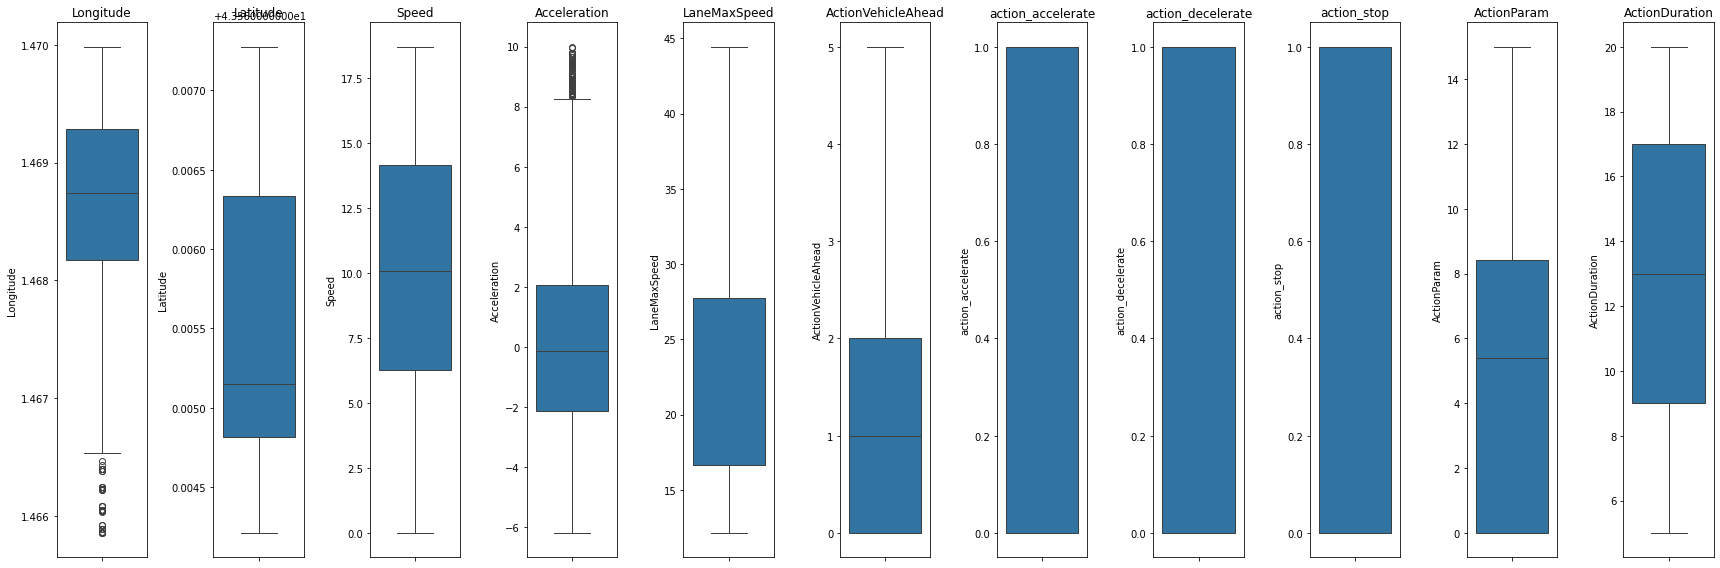

In [10]:
ml_columns = ['Longitude', 'Latitude', 'Speed','Acceleration', 'LaneMaxSpeed', 'ActionVehicleAhead',
                 'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'ActionDuration']

# Définir la taille de la figure
plt.figure(figsize=(24, 8))

# Parcourir chaque colonne et créer un boxplot
for i, col in enumerate(ml_columns):
    plt.subplot(1, len(ml_columns), i + 1)
    sns.boxplot(y=datas[col], orient='v')
    plt.title(col)

# Ajuster automatiquement les sous-tracés pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

In [11]:
iqr_longitude = - datas['Longitude'].quantile(.25) + datas['Longitude'].quantile(.75)
datas['Longitude'].quantile(.25) - 1.5*iqr_longitude

1.4665154013624768

### Filtrage des donnees

In [12]:
# Donnees aberrentes sur les collones d'entrees
datas = datas.drop(datas[(datas['Longitude'] < 1.467) | (datas['Acceleration'] > 8 )].index)

In [13]:
len(datas)

5937

<AxesSubplot:ylabel='y_travel'>

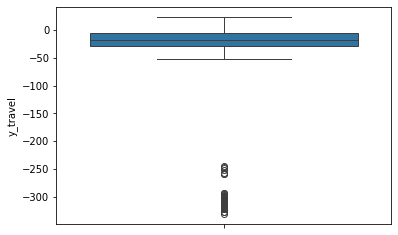

In [14]:
action_accelerate = datas[datas['action_accelerate'] == 1]
action_decelerate = datas[datas['action_decelerate'] == 1]
action_stop = datas[datas['action_stop'] == 1]
sns.boxplot(datas['y_travel'])

<AxesSubplot:ylabel='y_travel'>

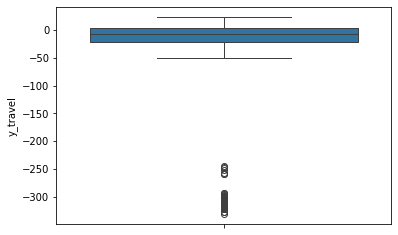

In [15]:
sns.boxplot(action_accelerate['y_travel'])

<AxesSubplot:ylabel='y_travel'>

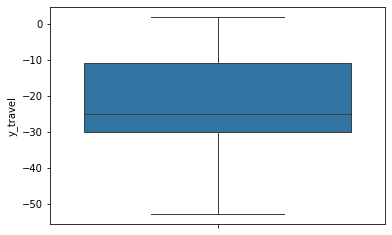

In [16]:
sns.boxplot(action_decelerate['y_travel'])

<AxesSubplot:ylabel='y_travel'>

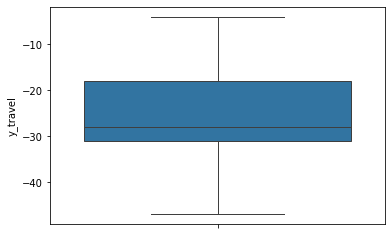

In [17]:
sns.boxplot(action_stop['y_travel'])

In [18]:
len(datas[(datas['y_travel'] <= -19) & (datas['action_accelerate'] == 1)])

746

<Figure size 576x432 with 0 Axes>

(array([  86.,    3.,    7.,    0.,    0.,    0.,    0.,    4.,  920.,
        1548.]),
 array([-332. , -296.4, -260.8, -225.2, -189.6, -154. , -118.4,  -82.8,
         -47.2,  -11.6,   24. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution de la Variable Cible pour les accelerations')

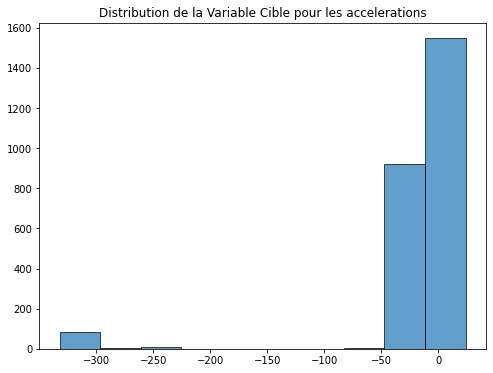

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(action_accelerate['y_travel'], edgecolor='black', alpha=0.7)
plt.title('Distribution de la Variable Cible pour les accelerations')
# sns.distplot(np.array(datas['y_travel'].values), kde=True)
plt.show()

<Figure size 576x432 with 0 Axes>

(array([  2.,   2.,  40., 212., 606.,  91., 181., 230., 237., 128.]),
 array([-53. , -47.5, -42. , -36.5, -31. , -25.5, -20. , -14.5,  -9. ,
         -3.5,   2. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution de la Variable Cible pour les decelerations')

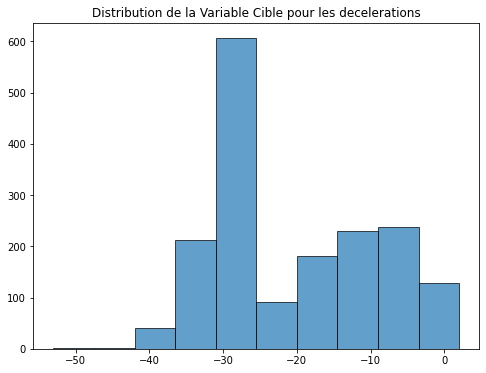

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(action_decelerate['y_travel'], edgecolor='black', alpha=0.7)
plt.title('Distribution de la Variable Cible pour les decelerations')
# sns.distplot(np.array(datas['y_travel'].values), kde=True)
plt.show()

<Figure size 576x432 with 0 Axes>

(array([  5.,  38.,  99., 499., 442.,  40., 178., 146., 115.,  78.]),
 array([-47. , -42.7, -38.4, -34.1, -29.8, -25.5, -21.2, -16.9, -12.6,
         -8.3,  -4. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution de la Variable Cible pour les stop')

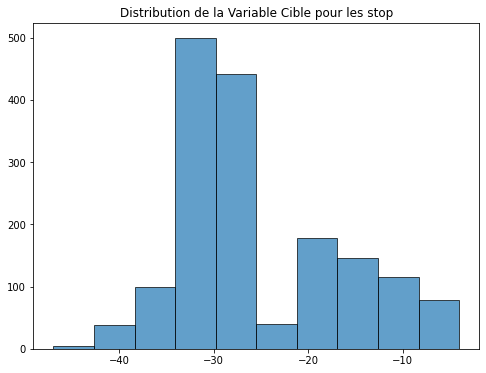

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(action_stop['y_travel'], edgecolor='black', alpha=0.7)
plt.title('Distribution de la Variable Cible pour les stop')
# sns.distplot(np.array(datas['y_travel'].values), kde=True)
plt.show()

In [22]:
action_accelerate['y_travel'].quantile(.25)

-21.0

In [23]:
len(datas)

5937

In [24]:
datas_filtered = datas.drop(datas[((datas['action_accelerate'] == 1) & (datas['y_travel']  < -20)) | (datas['y_travel'] <= -40)].index)
# datas_filtered = datas.drop(datas[((datas['action_accelerate'] == 1) & (datas['y_travel']  < -50))].index)

In [25]:
action_accelerate_filtered = datas_filtered[datas_filtered['action_accelerate'] == 1]
action_decelerate_filtered = datas_filtered[datas_filtered['action_decelerate'] == 1]
action_stop_filtered = datas_filtered[datas_filtered['action_stop'] == 1]

<AxesSubplot:ylabel='y_travel'>

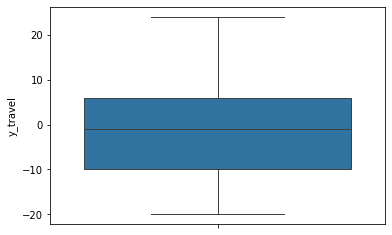

In [26]:
sns.boxplot(action_accelerate_filtered['y_travel'])

In [27]:
def filter_iqr_column(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # lower_bound = q1 - 1.5 * iqr
    lower_bound = q1
    # upper_bound = q3 + 1.5 * iqr
    upper_bound = q3
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

<AxesSubplot:ylabel='y_travel'>

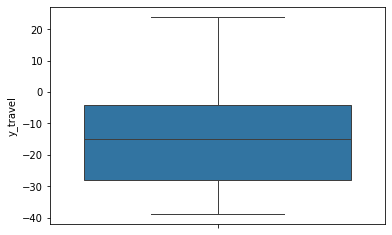

In [28]:
sns.boxplot(datas_filtered['y_travel'])

In [29]:
len(datas_filtered)

5211

In [30]:
negative_impact = datas_filtered[(datas_filtered['y_travel'] < 0)]
positive_impact = datas_filtered[(datas_filtered['y_travel'] >= 0)]

# len(negative_impact)
# len(positive_impact)
# max(negative_impact['y_travel'])
# min(negative_impact['y_travel'])
# min(positive_impact['y_travel'])
# max(positive_impact['y_travel'])

In [31]:
negative_impact_filtered = filter_iqr_column(negative_impact, 'y_travel')
# len(negative_impact_filtered)
# max(negative_impact_filtered['y_travel'])
# min(negative_impact_filtered['y_travel'])

In [32]:
positive_impact_acc = positive_impact[positive_impact['ActionId'] == 1]
positive_impact_otr = positive_impact[positive_impact['ActionId'] != 1]
len(positive_impact_acc)

934

In [33]:
negative_impact_acc = negative_impact[negative_impact['ActionId'] == 1]

negative_impact_dec = negative_impact[negative_impact['ActionId'] == 2]

negative_impact_stop = negative_impact[negative_impact['ActionId'] == 3]

len(negative_impact_dec)

1641

In [34]:
datas_filtered = (pd.concat([positive_impact_otr,
                             positive_impact_acc,
                             negative_impact_acc.sample(750, random_state= 42),
                             negative_impact_dec,
                             negative_impact_stop], 
                             ignore_index=True)).sample(frac=1, random_state=42).reset_index(drop=True)

# datas_filtered = (pd.concat([action_accelerate_filtered.sample(2000, random_state=42),
#                              action_decelerate_filtered,
#                              action_stop_filtered], 
#                              ignore_index=True)).sample(frac=1, random_state=42).reset_index(drop=True)

In [35]:
len(datas_filtered)

4998

<AxesSubplot:xlabel='count', ylabel='ActionName'>

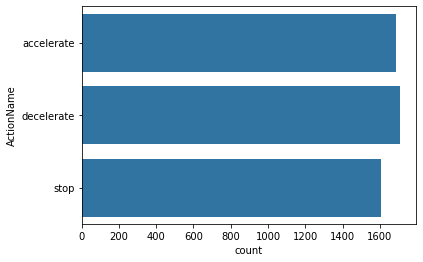

In [36]:
sns.countplot(datas_filtered['ActionName'], label="Count")

In [37]:
# plt.plot(datas['FuelConsumption'].tolist(), datas['CO2Emission'].tolist())

# plt.xlabel("Fuel's consumption")
# plt.ylabel('CO2 Emission')
# plt.title('Relation FuelConsumption-CO2Emission')

In [38]:
# data_transformed1 = pd.get_dummies(datas['ActionName'], prefix='action').astype(int)
# datas = pd.concat([datas, data_transformed1], axis=1)

In [39]:
# datas_filtered[(datas_filtered['y_travel'] > 0) & (datas_filtered['action_decelerate'] == 1)][['Speed', 'ActionParam', 'ActionDuration', 'DateTime']]

Text(0.5, 1.0, 'Distribution des y_travel')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Valeur')

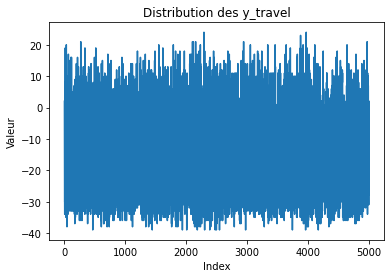

In [40]:
plt.plot(datas_filtered['y_travel'])

# Ajouter un titre et des labels si nécessaire
plt.title('Distribution des y_travel')
plt.xlabel('Index')
plt.ylabel('Valeur')

# Afficher le plot
plt.show()

<Figure size 576x432 with 0 Axes>

(array([ 387., 1345.,  305.,  696.,  685.,  496.,  575.,  331.,  135.,
          43.]),
 array([-39. , -32.7, -26.4, -20.1, -13.8,  -7.5,  -1.2,   5.1,  11.4,
         17.7,  24. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution de la Variable Cible')

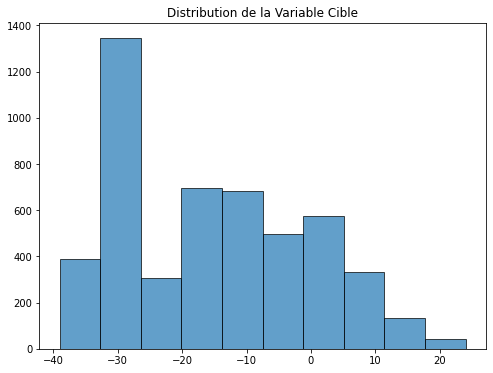

In [41]:
plt.figure(figsize=(8, 6))
plt.hist(datas_filtered['y_travel'], edgecolor='black', alpha=0.7)
plt.title('Distribution de la Variable Cible')
# sns.distplot(np.array(datas['y_travel'].values), kde=True)
plt.show()

In [42]:
datas_filtered.columns

Index(['DateTime', 'VehicleID', 'X', 'Y', 'Longitude', 'Latitude', 'Speed',
       'Acceleration', 'FuelConsumption', 'CO2Emission', 'TravelTime',
       'ActionId', 'ActionName', 'ActionParam', 'ActionDuration',
       'LaneMaxSpeed', 'Neighbors', 'AllowedSpeed', 'VehicleAdded',
       'VehicleAddedAhead', 'VehicleAddedBehind', 'ActionVehicleAhead',
       'ActionVehicleBehind', 'y_travel', 'y_fuel', 'y_co2',
       'action_accelerate', 'action_decelerate', 'action_stop'],
      dtype='object')

### Symetrie des donnees

In [43]:
pt = PowerTransformer()
datas_filtered['y_travel_transformed'] = pt.fit_transform(datas_filtered['y_travel'].values.reshape(-1, 1)).flatten()

<Figure size 576x432 with 0 Axes>

(array([ 387., 1345.,  305.,  594.,  690.,  540.,  565.,  351.,  178.,
          43.]),
 array([-1.66839406, -1.23816106, -0.80792807, -0.37769507,  0.05253792,
         0.48277092,  0.91300391,  1.3432369 ,  1.7734699 ,  2.20370289,
         2.63393589]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution de la Variable Cible')

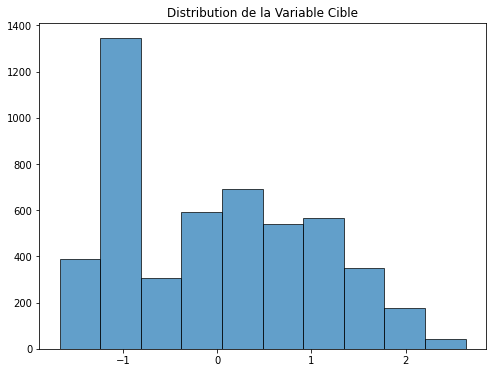

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(datas_filtered['y_travel_transformed'], edgecolor='black', alpha=0.7)
plt.title('Distribution de la Variable Cible')
plt.show()

In [45]:
columns = ['Longitude', 'Latitude', 'Speed', 'LaneMaxSpeed', 'Acceleration', 'action_accelerate', 'action_decelerate', 'action_stop', 'ActionParam', 'ActionDuration','ActionVehicleAhead', 'y_travel', 'y_travel_transformed']

In [46]:
pd.DataFrame(data=[datas_filtered[columns].skew(), datas_filtered[columns].kurtosis()], index=['skewness', 'kurtosis'])
# pd.DataFrame({"skewnwess":datas_filtered[columns].skew(), "kurtosis": datas_filtered[columns].kurtosis()}).T

,Longitude,Latitude,Speed,LaneMaxSpeed,Acceleration,action_accelerate,action_decelerate,action_stop,ActionParam,ActionDuration,ActionVehicleAhead,y_travel,y_travel_transformed
skewness,-0.005858,0.474239,0.009725,1.215543,0.529745,0.690193,0.665692,0.767406,0.308034,-0.069731,0.717093,0.370102,0.340142
kurtosis,-0.758393,-1.107491,-1.123888,1.566087,-0.353301,-1.524243,-1.557477,-1.411653,-0.984239,-1.206208,-0.105867,-0.968287,-1.017647


In [47]:
pd.DataFrame(data=[datas_filtered[['y_travel_transformed']].skew(), datas_filtered[['y_travel_transformed']].kurtosis()], index=['skewness', 'kurtosis'])
# pd.DataFrame({"skewnwess":datas_filtered[columns].skew(), "kurtosis": datas_filtered[columns].kurtosis()}).T

,y_travel_transformed
skewness,0.340142
kurtosis,-1.017647


### Correlation entre l'action et l'impact

In [48]:
final_datas = datas_filtered[[ 'Longitude','Latitude', 'Speed', 'Acceleration','LaneMaxSpeed',  'ActionId','action_accelerate', 'action_decelerate',
       'action_stop',  'ActionParam', 'ActionDuration','ActionVehicleAhead', 'y_travel', 'y_travel_transformed']]

<Figure size 1296x72 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Matrice de corrélation Pearson')

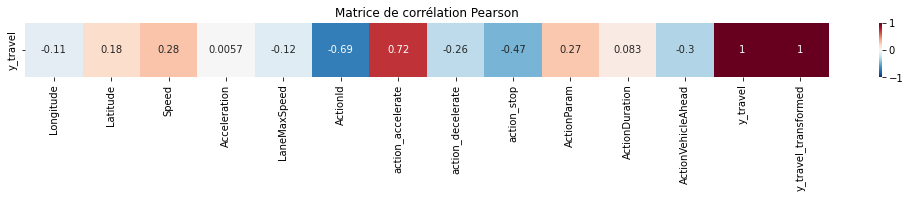

In [49]:
# Calculer la matrice de corrélation de Pearson
correlation_matrix_spearman = final_datas.corr()
# Afficher la matrice de corrélation
# print("Matrice de corrélation Spearman:\n", correlation_matrix_spearman)

# Visualiser la matrice de corrélation
plt.figure(figsize=(18, 1))
sns.heatmap(correlation_matrix_spearman.iloc[[-2]], annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1)
plt.title('Matrice de corrélation Pearson')
plt.show()

<Figure size 1296x72 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Matrice de corrélation Spearman')

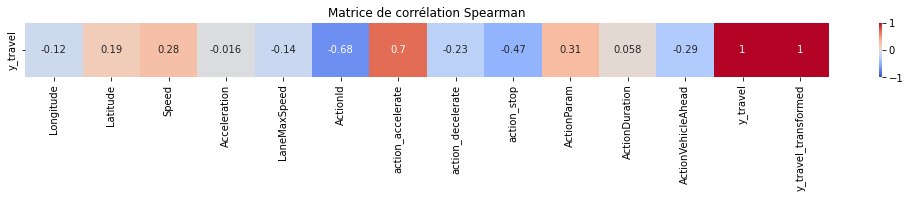

In [50]:
# Calculer la matrice de corrélation de Spearman
correlation_matrix_spearman = final_datas.corr(method="spearman")

# Afficher la matrice de corrélation
# print("Matrice de corrélation Spearman:\n", correlation_matrix_spearman)

# Visualiser la matrice de corrélation
plt.figure(figsize=(18, 1))
sns.heatmap(correlation_matrix_spearman.iloc[[-2]], annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matrice de corrélation Spearman')
plt.show()

In [51]:
new_datas = pd.read_csv("final_datas.csv")

<Figure size 576x432 with 0 Axes>

(array([  15.,  115., 1320., 1002.,  752.,  818.,  635.,  377.,  225.,
          40.]),
 array([-51. , -43.5, -36. , -28.5, -21. , -13.5,  -6. ,   1.5,   9. ,
         16.5,  24. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution de la Variable Cible')

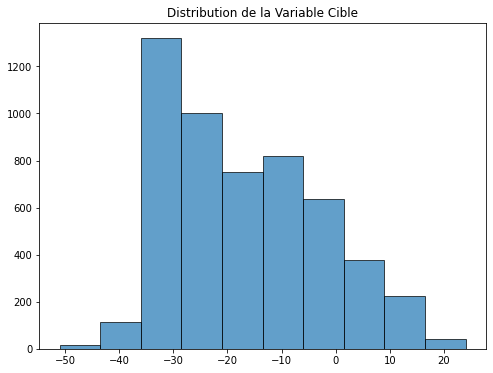

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(new_datas['y_travel'], edgecolor='black', alpha=0.7)
plt.title('Distribution de la Variable Cible')
# sns.distplot(np.array(datas['y_travel'].values), kde=True)
plt.show()

### Test des modeles

In [114]:
min(new_datas['ActionParam'])
max(new_datas['ActionParam'])

0.0

14.996217642026975

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, BaggingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

In [54]:
sign =  lambda x: 1 if x > 0 else (-1 if x < 0 else 0)

In [55]:
# ml_columns = ['Longitude', 'Latitude', 'Speed','Acceleration', 'LaneMaxSpeed', 'ActionVehicleAhead',
#                  'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'ActionDuration']

In [56]:
# from sklearn.ensemble import IsolationForest

# # Detection des outliers
# iso = IsolationForest(contamination=0.1)
# outliers = iso.fit_predict(datas[ml_columns])

# # Ajouter les résultats des outliers au DataFrame
# datas['Outlier'] = outliers

# # Filtrer les outliers
# outliers_df = datas[datas['Outlier'] == -1]

# print("Lignes identifiées comme outliers:")
# len(outliers_df)

In [57]:
# new_datas = datas.drop(datas[(datas['Outlier'] == -1)].index)
# len(new_datas)

In [58]:
X_travel = new_datas[['Longitude', 'Latitude', 'Speed','Acceleration','ActionVehicleAhead',
                 'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'StartTime', 'EndTime']].values
y_travel = new_datas['y_travel'].values
# y_travel = [[sign(y), abs(y)] for y in y_travel]
# y_travel

In [59]:
# test = datas[datas['TravelTime'] > 130]
# test[['ActionId', 'ActionDuration', 'TravelTime', 'y_travel']]
# len(test[test['ActionId'] == 2])

In [60]:
scaler = StandardScaler()
X_travel = scaler.fit_transform(X_travel)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_travel, y_travel, test_size=0.25, random_state=42)

In [62]:
min(datas_filtered['y_travel'])
max(datas_filtered['y_travel'])
# len(datas_filtered['ActionVehicleAhead'].unique())

-39.0

24.0

In [94]:
# Initialiser les modèles
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR Linear': SVR(kernel='linear'),
    'SVR Poly': SVR(kernel='poly'),
    'SVR RBF': SVR(kernel='rbf'),
    # 'SVR Sigmoid': SVR(kernel='sigmoid'),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [64]:
# Utiliser MultiOutputRegressor pour chaque modèle
multi_output_models = {name: MultiOutputRegressor(model) for name, model in models.items()}

In [65]:
def normalized_root_mean_squared_error(y_true, y_pred):
    val_min, val_max = min(y_true), max(y_true)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse / (val_max - val_min) 

### Cross Validation

In [95]:
from sklearn.model_selection import KFold, cross_val_score

names = []
result = []

for name, model in models.items():
    kfold = KFold(n_splits=10, random_state= 1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    result.append(cv_results)
    names.append(name)
    msg = "{0}: {1} ({2})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

Linear: 0.6760806940395038 (0.01819984020149314)
Ridge: 0.6763455491895416 (0.01822906353576673)
Lasso: 0.6061102798182411 (0.015682926172147817)
ElasticNet: 0.4936158998850829 (0.014947979676680056)
SVR Linear: 0.6668868279340304 (0.02114410308959386)
SVR Poly: 0.6410334219812246 (0.025619504675703224)
SVR RBF: 0.7062705065658712 (0.020545097569879343)
Decision Tree: 0.5827924587788702 (0.03773050372177939)
Random Forest: 0.778867308186898 (0.020488987510121848)
Gradient Boosting: 0.7328051259828515 (0.01740399372243145)
K-Nearest Neighbors: 0.6805298504137642 (0.030231257751079193)


LinearRegression()

Train Mean Squared Error for Linear: 0.10472678773855526
Test Mean Squared Error for Linear: 0.10784915786434283
Train R2 Score Linear: 0.6786145983195817
Test R2 Score Linear: 0.6994825026623417


Ridge()

Train Mean Squared Error for Ridge: 0.10472614767099207
Test Mean Squared Error for Ridge: 0.10788355435520837
Train R2 Score Ridge: 0.6786185267842413
Test R2 Score Ridge: 0.6992907831178619


Lasso()

Train Mean Squared Error for Lasso: 0.11574225528035186
Test Mean Squared Error for Lasso: 0.12118428757603003
Train R2 Score Lasso: 0.6074504702568271
Test R2 Score Lasso: 0.6205724382764115


ElasticNet()

Train Mean Squared Error for ElasticNet: 0.13125821093177134
Test Mean Squared Error for ElasticNet: 0.13849583877127622
Train R2 Score ElasticNet: 0.4951486273998732
Test R2 Score ElasticNet: 0.5044246497725615


SVR(kernel='linear')

Train Mean Squared Error for SVR Linear: 0.1063383241137025
Test Mean Squared Error for SVR Linear: 0.10915424896992135
Train R2 Score SVR Linear: 0.6686475366496067
Test R2 Score SVR Linear: 0.6921653245122024


SVR(kernel='poly')

Train Mean Squared Error for SVR Poly: 0.10771604702849802
Test Mean Squared Error for SVR Poly: 0.11636138340636427
Train R2 Score SVR Poly: 0.6600058888310749
Test R2 Score SVR Poly: 0.6501724579560897


SVR()

Train Mean Squared Error for SVR RBF: 0.09778484147350451
Test Mean Squared Error for SVR RBF: 0.10228608117492687
Train R2 Score SVR RBF: 0.719809341118334
Test R2 Score SVR RBF: 0.7296855095839624


DecisionTreeRegressor()

Train Mean Squared Error for Decision Tree: 0.0
Test Mean Squared Error for Decision Tree: 0.12623083743150199
Train R2 Score Decision Tree: 1.0
Test R2 Score Decision Tree: 0.5883129807244019


RandomForestRegressor()

Train Mean Squared Error for Random Forest: 0.03204341571944347
Test Mean Squared Error for Random Forest: 0.08599802314167884
Train R2 Score Random Forest: 0.9699123555147858
Test R2 Score Random Forest: 0.8089209017261357


GradientBoostingRegressor()

Train Mean Squared Error for Gradient Boosting: 0.08582629423874964
Test Mean Squared Error for Gradient Boosting: 0.09755462163207604
Train R2 Score Gradient Boosting: 0.7841503728395038
Test R2 Score Gradient Boosting: 0.7541150516518453


KNeighborsRegressor()

Train Mean Squared Error for K-Nearest Neighbors: 0.08564406184367651
Test Mean Squared Error for K-Nearest Neighbors: 0.10751440187603568
Train R2 Score K-Nearest Neighbors: 0.7850660138021525
Test R2 Score K-Nearest Neighbors: 0.7013451765339096


Text(0.5, 0, 'Model')

Text(0, 0.5, 'Mean Squared Error')

Text(0, 0.5, 'R2 Score')

Text(0.5, 1.05, 'Comparison of Regression Models')

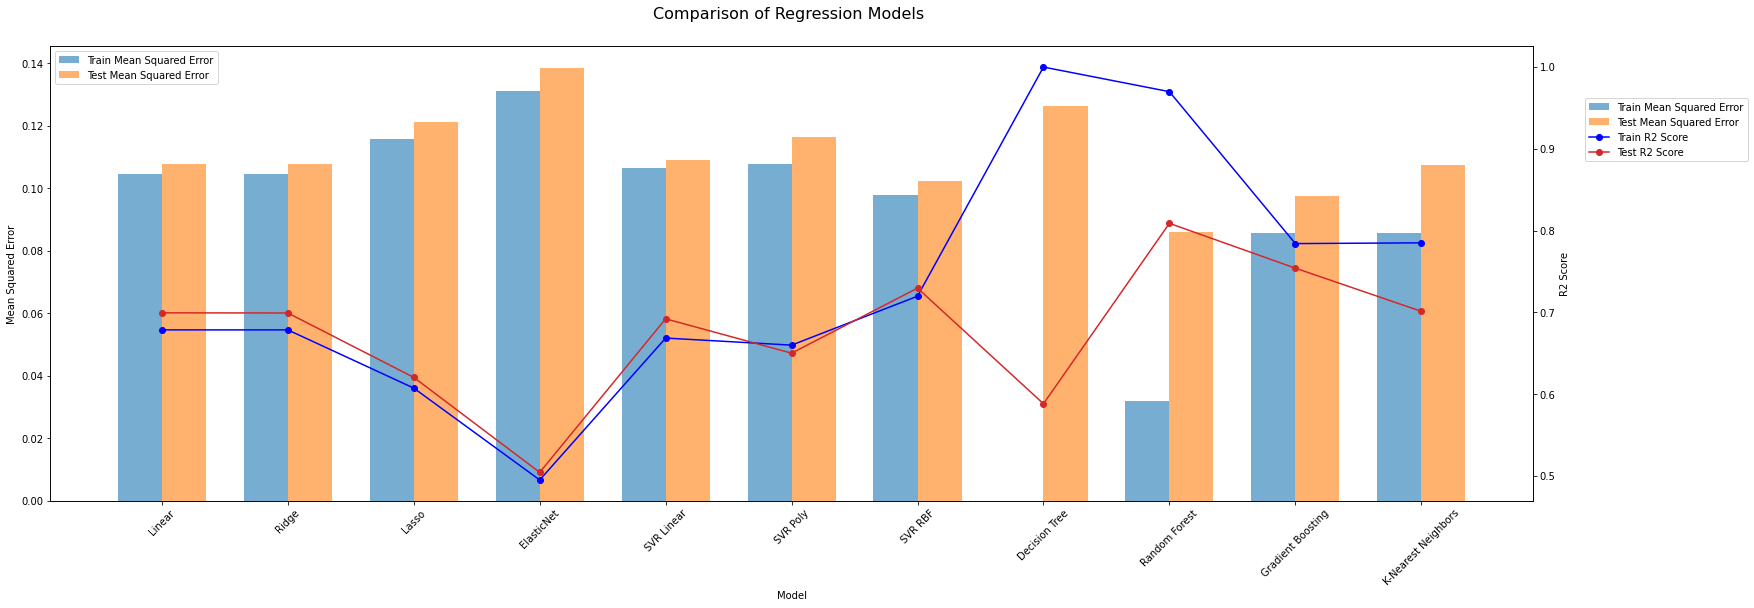

In [96]:
# Dictionnaire pour stocker les résultats
results = {'Model': [], 'Train Mean Squared Error': [], 'Test Mean Squared Error': [], 'Train R2 Score': [], 'Test R2 Score': []}


train_predictions = {}
trained_models = {}
# Entraîner et évaluer chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    # Prédictions sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train)
    train_nrmse = normalized_root_mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    y_pred = model.predict(X_test)
    nrmse = normalized_root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['Model'].append(name)
    results['Train Mean Squared Error'].append(train_nrmse)
    results['Test Mean Squared Error'].append(nrmse)
    results['Train R2 Score'].append(train_r2)
    results['Test R2 Score'].append(r2)

    train_predictions[name] = pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred, 'squared_error': (y_train - y_train_pred) **2})
    trained_models[name] = model

    print(f"Train Mean Squared Error for {name}: {train_nrmse}")
    print(f"Test Mean Squared Error for {name}: {nrmse}")
    print(f"Train R2 Score {name}: {train_r2}")
    print(f"Test R2 Score {name}: {r2}")

# Convertir les résultats en DataFrame pour une manipulation plus facile
results_df = pd.DataFrame(results)

# Convertir les colonnes du DataFrame en tableaux NumPy
models = results_df['Model'].to_numpy()
train_mse_values = results_df['Train Mean Squared Error'].to_numpy()
test_mse_values = results_df['Test Mean Squared Error'].to_numpy()
train_r2_values = results_df['Train R2 Score'].to_numpy()
test_r2_values = results_df['Test R2 Score'].to_numpy()

# Tracer les résultats
fig, ax1 = plt.subplots(figsize=(22, 8))

# Position des barres
x = np.arange(len(models))  # la position des groupes
width = 0.35  # la largeur des barres

# Tracer les Mean Squared Error pour l'entraînement et le test côte à côte
rects1 = ax1.bar(x - width/2, train_mse_values, width, label='Train Mean Squared Error', color='#1f77b4', alpha=0.6)
rects2 = ax1.bar(x + width/2, test_mse_values, width, label='Test Mean Squared Error', color='#ff7f0e', alpha=0.6)

# Tracer les Mean Squared Error
# color = 'tab:red'
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Squared Error')
# ax1.bar(models, mse_values, color=color, alpha=0.6, label='Mean Squared Error')
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.bar(models, train_mse_values, color='blue', alpha=0.6, label='Train Mean Squared Error')
# ax1.bar(models, test_mse_values, color='red', alpha=0.6, label='Test Mean Squared Error', bottom=train_mse_values)
ax1.set_xticks(x)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Ajouter une deuxième axe pour le R2 Score
ax2 = ax1.twinx()
# color = 'tab:blue'
ax2.set_ylabel('R2 Score')
# ax2.plot(models, r2_values, color=color, marker='o', linewidth=2, label='R2 Score')
# ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(models, train_r2_values, color='blue', marker='o', label='Train R2 Score')
ax2.plot(models, test_r2_values, color='#d62728', marker='o', label='Test R2 Score')
ax2.tick_params(axis='y')

# Ajouter un titre et afficher la légende
fig.tight_layout()
fig.suptitle('Comparison of Regression Models', y=1.05, fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(1, 0.9))

# Afficher le graphique
plt.show()

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Définir la grille d'hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialiser le modèle de Random Forest
rf = RandomForestRegressor(random_state=42)

# Initialiser la recherche aléatoire
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Entraîner la recherche aléatoire
rf_random.fit(X_train, y_train)

# Meilleurs hyperparamètres
print(rf_random.best_params_)

# Évaluer le modèle avec les meilleurs hyperparamètres
best_rf = rf_random.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
Train Mean Squared Error: 9.202405200182715
Test Mean Squared Error: 37.84346769993149
Train R2 Score: 0.9520609519419001
Test R2 Score: 0.8113911013186119


In [69]:
from sklearn.linear_model import RidgeCV

model_1 = DecisionTreeRegressor(random_state=0)
model_2 = KNeighborsRegressor()
model_3 = RandomForestRegressor(random_state=42)
model_4 = GradientBoostingRegressor(random_state=42)

model_5 = StackingRegressor([('RBF', model_3), ('GBR', model_4)], final_estimator=RidgeCV())

# for model in (model_1, model_2, model_3, model_4):
#     model.fit(X_train, y_train)
#     print(model.__class__.__name__, model.score(X_test, y_test))
model_3.fit(X_train, y_train)
model_3.score(X_train, y_train)

model_3.score(X_test, y_test)


model_5.fit(X_train, y_train)
model_5.score(X_train, y_train)
model_5.score(X_test, y_test)

# Prédictions pour l'entraînement et le test
y_train_pred = model_5.predict(X_train)
y_test_pred = model_5.predict(X_test)

# Calculer le MSE et les scores R2
train_mse = normalized_root_mean_squared_error(y_train, y_train_pred)
test_mse = normalized_root_mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train NR Mean Squared Error: {train_mse}")
print(f"Test NR Mean Squared Error: {test_mse}")
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")

RandomForestRegressor(random_state=42)

0.9697035152992518

0.8126678512960622

StackingRegressor(estimators=[('RBF', RandomForestRegressor(random_state=42)),
                              ('GBR',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=RidgeCV())

0.9527957634507616

0.8125308001225423

Train NR Mean Squared Error: 0.04013610265426824
Test NR Mean Squared Error: 0.08518180518469654
Train R2 Score: 0.9527957634507616
Test R2 Score: 0.8125308001225423


In [70]:
# param_grid = {
#     'RBF__n_estimators': [100, 200, 300],
#     'RBF__max_depth': [None, 10, 20],
#     'RBF__min_samples_split': [2, 5, 10],
#     'RBF__min_samples_leaf': [1, 2, 4],
#     'GBR__n_estimators': [100, 200, 300],
#     'GBR__learning_rate': [0.01, 0.05, 0.1],
#     'GBR__max_depth': [3, 4, 5],
#     'GBR__min_samples_split': [2, 5, 10],
#     'GBR__min_samples_leaf': [1, 2, 4],
#     'DTR__max_depth': [None, 10, 20],
#     'DTR__min_samples_split': [2, 5, 10],
#     'DTR__min_samples_leaf': [1, 2, 4]
# }
# random_search = RandomizedSearchCV(
#     estimator=model_5,
#     param_distributions=param_grid,
#     n_iter=100,
#     cv=3,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# # Entraîner le modèle
# random_search.fit(X_train, y_train)

# # Meilleurs paramètres
# print(f"Meilleurs paramètres: {random_search.best_params_}")


In [71]:
# # Meilleur modèle
# best_model = random_search.best_estimator_

# # Prédictions pour l'entraînement et le test
# y_train_pred = best_model.predict(X_train)
# y_test_pred = best_model.predict(X_test)

# # Calculer le MSE et les scores R2
# train_mse = mean_squared_error(y_train, y_train_pred)
# test_mse = mean_squared_error(y_test, y_test_pred)
# train_r2 = r2_score(y_train, y_train_pred)
# test_r2 = r2_score(y_test, y_test_pred)

# print(f"Train Mean Squared Error: {train_mse}")
# print(f"Test Mean Squared Error: {test_mse}")
# print(f"Train R2 Score: {train_r2}")
# print(f"Test R2 Score: {test_r2}")


In [72]:
rf_model = trained_models['Random Forest']

In [73]:
import joblib
joblib.dump(rf_model, 'rf_travel.joblib')

['rf_travel.joblib']

In [74]:
new_columns = ['Longitude', 'Latitude', 'Speed','Acceleration', 'LaneMaxSpeed', 'ActionVehicleAhead',
                 'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'ActionDuration', 'y_train', 'y_train_pred', 'squared_error']

In [75]:
feature_imporance = pd.DataFrame({
    'Feature': new_columns[:-3],
    'Importance': rf_model.feature_importances_
    })
feature_imporance.T

,0,1,2,3,4,5,6,7,8,9,10
Feature,Longitude,Latitude,Speed,Acceleration,LaneMaxSpeed,ActionVehicleAhead,action_accelerate,action_decelerate,action_stop,ActionParam,ActionDuration
Importance,0.078216,0.112373,0.108589,0.031314,0.04129,0.266698,0.00328,0.003095,0.054453,0.187813,0.112881


<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

Text(0.5, 1.0, 'Feature Importances')

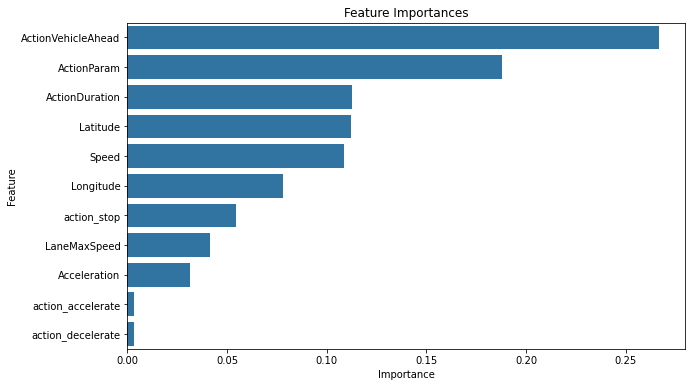

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imporance.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.show()

In [77]:
rf_train = train_predictions['Random Forest']
rf_train_mse = results_df[results_df['Model'] == 'Random Forest']['Train Mean Squared Error'].values[0]
# rf_train_mse
# rf_train['y_train_original'] = pt.inverse_transform(rf_train['y_train'].values.reshape(-1, 1)).flatten()
# rf_train['y_pred_original'] = pt.inverse_transform(rf_train['y_train_pred'].values.reshape(-1, 1)).flatten()
rf_train = pd.concat([pd.DataFrame(X_train), rf_train], axis=1)
rf_train = rf_train.rename(columns=dict(zip(rf_train.columns, new_columns)))
rf_train_mse

0.0319848986483035

In [78]:
bad_training = rf_train[rf_train['squared_error'] > rf_train_mse]
good_training = rf_train[rf_train['squared_error'] <= rf_train_mse]

len(bad_training)
len(good_training)

3612

362

In [79]:
good_training_mean = good_training.mean()
good_training_mean

Longitude             -0.102330
Latitude               0.097636
Speed                 -0.067109
Acceleration           0.022885
LaneMaxSpeed          -0.030037
ActionVehicleAhead    -0.322717
action_accelerate      0.090001
action_decelerate      0.248721
action_stop           -0.196433
ActionParam            0.125210
ActionDuration         0.114725
y_train              -19.632597
y_train_pred         -19.636160
squared_error          0.010245
dtype: float64

In [80]:
bad_training_mean = bad_training.mean()
bad_training_mean

Longitude             -0.008656
Latitude              -0.005598
Speed                 -0.003314
Acceleration          -0.006160
LaneMaxSpeed           0.004422
ActionVehicleAhead     0.030113
action_accelerate      0.003073
action_decelerate     -0.034800
action_stop            0.032830
ActionParam           -0.017812
ActionDuration        -0.018446
y_train              -16.888151
y_train_pred         -16.919574
squared_error          6.330269
dtype: float64

In [81]:
best_10 = good_training.sort_values(by="squared_error", ascending=True)[:10]

In [82]:
worst_10 = bad_training.sort_values(by="squared_error", ascending=False)[:20]

In [83]:
best_10[best_10['action_stop'] > 0]

,Longitude,Latitude,Speed,Acceleration,LaneMaxSpeed,ActionVehicleAhead,action_accelerate,action_decelerate,action_stop,ActionParam,ActionDuration,y_train,y_train_pred,squared_error
1934,-0.982949,1.327006,-1.024340,-0.000794,-1.174885,1.284329,-0.681631,-0.662989,0.281821,1.333789,0.869747,-17.0,-17.0,0.0
2215,-1.094236,-1.470538,-1.918394,0.503206,2.167333,-0.778617,1.467069,-0.662989,2.116462,-1.605119,-2.009259,-28.0,-28.0,0.0
1717,0.034822,0.466307,1.561696,1.652921,-0.339331,1.284329,-0.681631,-0.662989,0.845342,0.158226,0.431637,6.0,6.0,0.0
3505,-0.757461,1.124754,-1.245353,-1.440194,0.496224,1.284329,-0.681631,-0.662989,0.156394,0.354153,0.681986,3.0,3.0,0.0
2121,-2.398174,1.524791,1.183581,-0.296495,-0.339331,1.284329,-0.681631,-0.662989,0.568299,1.725643,1.433031,-6.0,-6.0,0.0
1424,-2.314070,1.559855,1.526798,0.636936,-0.339331,-0.778617,1.467069,-0.662989,2.289994,1.464407,1.370444,-7.0,-7.0,0.0


In [84]:
best_10

,Longitude,Latitude,Speed,Acceleration,LaneMaxSpeed,ActionVehicleAhead,action_accelerate,action_decelerate,action_stop,ActionParam,ActionDuration,y_train,y_train_pred,squared_error
1934,-0.982949,1.327006,-1.024340,-0.000794,-1.174885,1.284329,-0.681631,-0.662989,0.281821,1.333789,0.869747,-17.0,-17.0,0.0
2129,-0.186273,0.651065,0.549082,0.833070,-1.174885,-0.778617,1.467069,-0.662989,-0.423581,1.333789,0.932334,-30.0,-30.0,0.0
2215,-1.094236,-1.470538,-1.918394,0.503206,2.167333,-0.778617,1.467069,-0.662989,2.116462,-1.605119,-2.009259,-28.0,-28.0,0.0
1717,0.034822,0.466307,1.561696,1.652921,-0.339331,1.284329,-0.681631,-0.662989,0.845342,0.158226,0.431637,6.0,6.0,0.0
1553,0.686193,-0.570310,-0.976411,-0.577501,-1.174885,-0.778617,-0.681631,1.508321,-1.200589,-1.343883,-1.383388,-10.0,-10.0,0.0
2739,0.026538,0.473229,1.845176,1.203943,-1.174885,-0.778617,-0.681631,1.508321,-1.200589,-0.103011,-0.131647,-11.0,-11.0,0.0
3505,-0.757461,1.124754,-1.245353,-1.440194,0.496224,1.284329,-0.681631,-0.662989,0.156394,0.354153,0.681986,3.0,3.0,0.0
2121,-2.398174,1.524791,1.183581,-0.296495,-0.339331,1.284329,-0.681631,-0.662989,0.568299,1.725643,1.433031,-6.0,-6.0,0.0
977,-0.159882,0.629012,0.002071,-0.031085,-1.174885,-0.778617,-0.681631,1.508321,-1.200589,0.811316,0.556811,-28.0,-28.0,0.0
1424,-2.314070,1.559855,1.526798,0.636936,-0.339331,-0.778617,1.467069,-0.662989,2.289994,1.464407,1.370444,-7.0,-7.0,0.0


In [85]:
worst_10

,Longitude,Latitude,Speed,Acceleration,LaneMaxSpeed,ActionVehicleAhead,action_accelerate,action_decelerate,action_stop,ActionParam,ActionDuration,y_train,y_train_pred,squared_error
602,0.465311,-0.680380,-1.433885,-1.422087,-0.339331,1.284329,-0.681631,-0.662989,-0.080237,-1.082646,-0.694930,-44.0,-30.26,188.7876
3207,-0.038630,0.527687,1.341800,-0.814402,-1.174885,1.284329,-0.681631,-0.662989,0.627021,-0.103011,-0.569756,-30.0,-16.95,170.3025
2892,0.081583,0.427634,0.884570,-0.266719,-0.339331,1.284329,-0.681631,-0.662989,-0.253650,0.158226,-0.256821,-33.0,-21.15,140.4225
2691,0.181606,0.349444,1.521659,-0.352599,-0.339331,-0.778617,1.467069,-0.662989,0.682244,0.027608,-0.194234,-36.0,-24.33,136.1889
2331,-0.621088,-1.109912,0.477051,-0.468059,0.496224,1.284329,-0.681631,-0.662989,-0.070129,-1.539810,-1.007866,-27.0,-15.60,129.9600
3634,1.452355,-0.327893,0.405878,-1.440194,1.331779,1.284329,-0.681631,-0.662989,0.703532,0.941934,0.494224,-50.0,-38.68,128.1424
1686,-2.220354,1.598894,1.217451,-0.168512,-1.174885,1.284329,-0.681631,-0.662989,0.113463,1.203170,1.057508,-30.0,-18.91,122.9881
2990,1.051094,-0.746576,1.187653,2.240939,-1.174885,1.284329,-0.681631,-0.662989,-0.200766,-0.560174,-0.569756,-32.0,-21.25,115.5625
370,1.738789,-0.517805,1.142928,0.228817,0.496224,1.284329,-0.681631,-0.662989,0.217437,-0.821410,-1.133040,-30.0,-19.49,110.4601
1558,0.355297,-0.716314,-1.651249,-0.783135,-0.339331,1.284329,-0.681631,-0.662989,0.488641,-0.233629,0.243876,2.0,-8.40,108.1600


In [86]:
worst_mean = bad_training_mean.drop(['y_train', 'y_train_pred', 'squared_error'])
overall_mean = rf_train.mean().drop(['y_train', 'y_train_pred', 'squared_error'])
best_mean = good_training_mean.drop(['y_train', 'y_train_pred', 'squared_error'])

<AxesSubplot:>

Text(0.5, 1.0, 'Comparaison des Moyennes des Caractéristiques')

Text(0.5, 0, 'Caractéristiques')

Text(0, 0.5, 'Valeur Moyenne')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Longitude'),
  Text(1, 0, 'Latitude'),
  Text(2, 0, 'Speed'),
  Text(3, 0, 'Acceleration'),
  Text(4, 0, 'LaneMaxSpeed'),
  Text(5, 0, 'ActionVehicleAhead'),
  Text(6, 0, 'action_accelerate'),
  Text(7, 0, 'action_decelerate'),
  Text(8, 0, 'action_stop'),
  Text(9, 0, 'ActionParam'),
  Text(10, 0, 'ActionDuration')])

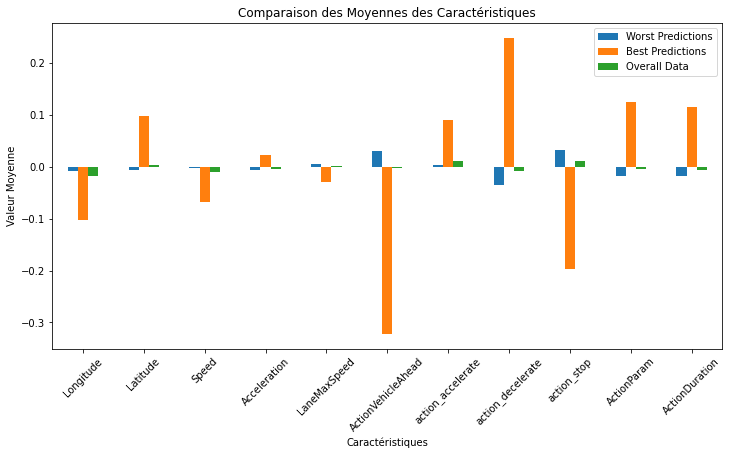

In [87]:
import matplotlib.pyplot as plt

# Comparaison des moyennes
comparison_df = pd.DataFrame({
    'Worst Predictions': worst_mean,
    'Best Predictions': best_mean,
    'Overall Data': overall_mean
})

comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparaison des Moyennes des Caractéristiques')
plt.xlabel('Caractéristiques')
plt.ylabel('Valeur Moyenne')
plt.xticks(rotation=45)
plt.show()


In [88]:
from sklearn.ensemble import IsolationForest

# Detection des outliers
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(rf_train.drop(['y_train', 'y_train_pred', 'squared_error'], axis=1))

# Ajouter les résultats des outliers au DataFrame
rf_train['Outlier'] = outliers

# Filtrer les outliers
outliers_df = rf_train[rf_train['Outlier'] == -1]

print("Lignes identifiées comme outliers:")
len(outliers_df)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Lignes identifiées comme outliers:


398

In [89]:
outliers_df_mean = outliers_df.drop(['y_train', 'y_train_pred', 'squared_error', 'Outlier'], axis =1).mean()
normal_df_mean = rf_train[rf_train['Outlier'] == 1].drop(['y_train', 'y_train_pred', 'squared_error', 'Outlier'], axis=1).mean()

<AxesSubplot:>

Text(0.5, 1.0, 'Comparaison des Moyennes des Caractéristiques')

Text(0.5, 0, 'Caractéristiques')

Text(0, 0.5, 'Valeur Moyenne')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Longitude'),
  Text(1, 0, 'Latitude'),
  Text(2, 0, 'Speed'),
  Text(3, 0, 'Acceleration'),
  Text(4, 0, 'LaneMaxSpeed'),
  Text(5, 0, 'ActionVehicleAhead'),
  Text(6, 0, 'action_accelerate'),
  Text(7, 0, 'action_decelerate'),
  Text(8, 0, 'action_stop'),
  Text(9, 0, 'ActionParam'),
  Text(10, 0, 'ActionDuration')])

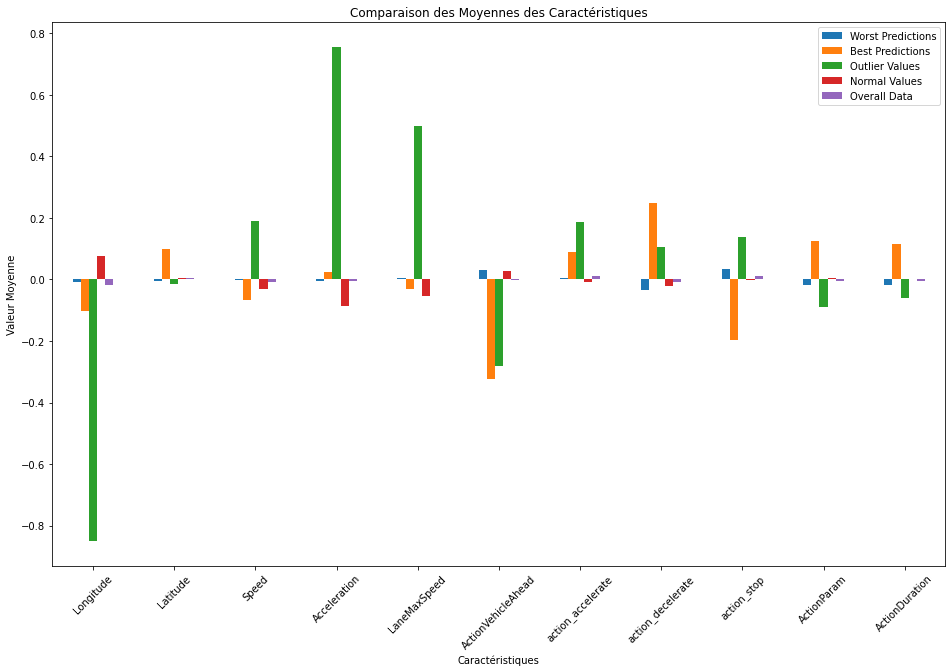

In [90]:
import matplotlib.pyplot as plt

# Comparaison des moyennes
comparison_df = pd.DataFrame({
    'Worst Predictions': worst_mean,
    'Best Predictions': best_mean,
    'Outlier Values': outliers_df_mean,
    'Normal Values': normal_df_mean,
    'Overall Data': overall_mean
})

comparison_df.plot(kind='bar', figsize=(16, 10))
plt.title('Comparaison des Moyennes des Caractéristiques')
plt.xlabel('Caractéristiques')
plt.ylabel('Valeur Moyenne')
plt.xticks(rotation=45)
plt.show()


In [91]:
X = new_datas[['Longitude', 'Latitude', 'Speed','Acceleration', 'LaneMaxSpeed', 'ActionVehicleAhead',
                 'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'ActionDuration']]
y = new_datas['y_travel']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle et du dictionnaire pour stocker les résultats
base_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
results = {}

for col in ml_columns:
    print(f"Suppression de la colonne: {col}")

    X_reduced = X.drop(col, axis=1)
    # Diviser les données en ensemble d'entraînement et de test
    # X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Créez une copie du dataset en supprimant la colonne courante
    X_train_reduced = X_train.drop(col, axis=1).values
    X_test_reduced = X_test.drop(col, axis=1).values
    
    # Entraîner le modèle avec les données réduites
    base_model.fit(X_train_reduced, y_train)

    # Predire sur l'ensemble d'entrainement
    y_tr_p = base_model.predict(X_train_reduced) 
    train_mse = mean_squared_error(y_train, y_tr_p)
    # Prédire sur l'ensemble de test réduit
    y_pred = base_model.predict(X_test_reduced)
    
    # Calculer la MSE
    test_mse = mean_squared_error(y_test, y_pred)

    # Stocker les résultats
    results[col] = {'train_mse': train_mse, 'test_mse': test_mse}

# Affichage des résultats
for col, scores in sorted(results.items(), key=lambda item: item[1]['test_mse']):
    print(f"Supprimer la colonne {col} donne une MSE de : {scores['train_mse']} (train), {scores['test_mse']} (test)")

KeyError: "['LaneMaxSpeed'] not in index"

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score


clf = RandomForestRegressor(random_state=42)

k_folds = KFold(n_splits = 10)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.76137406 0.72766279 0.74892691 0.72571741 0.76371985 0.77780014
 0.72724659 0.74303356 0.71937604 0.77377625]
Average CV Score:  0.7468633583578239
Number of CV Scores used in Average:  10


In [ ]:
# Utilisation de Kfold
from sklearn.model_selection import KFold, cross_val_score

model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
X = new_datas[['Longitude', 'Latitude', 'Speed','Acceleration', 'LaneMaxSpeed', 'ActionVehicleAhead',
                 'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'ActionDuration']]
y = new_datas['y_travel']

kf = KFold(n_splits=10
           , shuffle=True, random_state=42)

train_mse_scores = []
test_mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    # Prédire sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train)
    
    # Prédire sur l'ensemble de test
    y_test_pred = model.predict(X_test)
    
    # Calculer la MSE pour l'ensemble d'entraînement
    train_mse = mean_squared_error(y_train, y_train_pred)
    
    # Calculer la MSE pour l'ensemble de test
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"MSE pour l'entrainement: {train_mse}")
    print(f"MSE pour le test: {test_mse}")

    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

# Calculer la moyenne des MSE pour chaque pli
avg_train_mse = np.mean(train_mse_scores)
avg_test_mse = np.mean(test_mse_scores)


print(f'Moyenne MSE pour les données d\'entraînement: {avg_train_mse}')
print(f'Moyenne MSE pour les données de test: {avg_test_mse}')

RandomForestRegressor(random_state=42)

MSE pour l'entrainement: 7.324317552915863
MSE pour le test: 55.234357536769366


RandomForestRegressor(random_state=42)

MSE pour l'entrainement: 7.395824394963091
MSE pour le test: 50.77789254592294


RandomForestRegressor(random_state=42)

MSE pour l'entrainement: 7.3867724843118445
MSE pour le test: 50.6822930050506


RandomForestRegressor(random_state=42)

MSE pour l'entrainement: 7.452936602774127
MSE pour le test: 48.59923873863127


RandomForestRegressor(random_state=42)

MSE pour l'entrainement: 7.497368094962246
MSE pour le test: 46.705699247479835


RandomForestRegressor(random_state=42)

MSE pour l'entrainement: 7.249862184429539
MSE pour le test: 55.07338453040994


RandomForestRegressor(random_state=42)

MSE pour l'entrainement: 7.326906150369972
MSE pour le test: 54.16549592735763


RandomForestRegressor(random_state=42)

MSE pour l'entrainement: 7.228244887128283
MSE pour le test: 52.01324184884633


RandomForestRegressor(random_state=42)

MSE pour l'entrainement: 7.261885661271308
MSE pour le test: 56.51997107672491


RandomForestRegressor(random_state=42)

MSE pour l'entrainement: 7.328073097501861
MSE pour le test: 52.28129427472616
Moyenne MSE pour les données d'entraînement: 7.345219111062813
Moyenne MSE pour les données de test: 52.2052868731919


In [ ]:
outliers_df[outliers_df['action_decelerate'] > 0]

,Longitude,Latitude,Speed,Acceleration,LaneMaxSpeed,ActionVehicleAhead,action_accelerate,action_decelerate,action_stop,ActionParam,ActionDuration,y_train,y_train_pred,squared_error,Outlier
0,1.079480,-0.820138,1.448653,2.045024,-0.719768,-1.131376,-0.757492,1.443973,-0.672262,2.080065,-1.254233,-1.0,-3.42,5.8564,-1
5,-1.635845,1.916380,1.354226,0.689445,-1.093975,0.557570,-0.757492,1.443973,-0.672262,0.468886,0.710386,-13.0,-12.62,0.1444,-1
12,1.400597,-0.383946,-0.086773,-0.318417,3.611673,0.557570,-0.757492,1.443973,-0.672262,1.438694,-0.162778,-29.0,-27.99,1.0201,-1
29,1.681003,-0.662382,0.820884,0.619985,-0.719768,2.246515,-0.757492,1.443973,-0.672262,2.135715,0.492095,-36.0,-32.25,14.0625,-1
35,-0.870015,-1.498966,-1.786134,0.681805,1.014055,2.246515,-0.757492,1.443973,-0.672262,0.570882,-0.381069,-27.0,-27.91,0.8281,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,-0.839155,-1.470246,-1.038980,1.776363,1.014055,0.557570,-0.757492,1.443973,-0.672262,2.027641,-1.690815,-15.0,-13.91,1.1881,-1
4334,-2.282601,1.326300,1.247892,-0.087424,-0.719768,-1.131376,-0.757492,1.443973,-0.672262,2.261642,0.928677,-7.0,-6.20,0.6400,-1
4369,1.399577,-0.383696,0.300190,-1.372938,3.611673,0.557570,-0.757492,1.443973,-0.672262,1.051158,-1.690815,-27.0,-25.28,2.9584,-1
4372,1.079480,-0.820138,1.448653,2.045024,-0.719768,-1.131376,-0.757492,1.443973,-0.672262,1.906577,1.583550,1.0,-2.32,11.0224,-1


### Deep Learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import time

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# torch.manuel_seed(42)

In [ ]:
# Convertir les données en tensors PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor([[y] for y in y_train], dtype=torch.float32).to(device)
y_test = torch.tensor([[y] for y in y_test], dtype=torch.float32).to(device)

C:\Users\USER\AppData\Local\Temp/ipykernel_19036/162567125.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\USER\AppData\Local\Temp/ipykernel_19036/162567125.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


In [ ]:
class TravelModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(TravelModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 16)
        self.layer2 = nn.Linear(16, 32)
        self.layer3 = nn.Linear(32, 64)
        self.layer4 = nn.Linear(64, 64)
        self.output_layer = nn.Linear(64, output_dim)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.tanh(self.layer4(x))
        x = self.output_layer(x)
        return x

input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
model = TravelModel(input_dim, output_dim).to(device)


In [ ]:
BATCH_SIZE = 16
dataset_train = TensorDataset(X_train, y_train)
dataloader_train = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True)

dataset_test = TensorDataset(X_test, y_test)
dataloader_test = DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
# es = EarlyStopping()

In [ ]:
# # Entrainement du modele

# num_epochs = 100
# epoch_counts = []
# # epoch = 0
# train_losses = []
# val_losses = []
# done = False

# for epoch in range(num_epochs):
#     # epoch += 1
#     # steps = list(enumerate(dataloader_train))
#     # pbar = tqdm.tqdm(steps)
#     # model.train()
#     y_train_pred = model(X_train)
#     train_loss = loss_fn(y_train_pred, y_train)
#     optimizer.zero_grad()
#     optimizer.step()

#     # Evaluation
#     model.eval()
#     with torch.inference_mode():
#         test_pred = model(X_test)
#         val_loss = loss_fn(test_pred, X_test)


#     if epoch %10 == 0:
#         epoch_counts.append(epoch)
#         train_losses.append(train_loss)
#         val_losses.append(val_loss)
#         print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {val_loss}")








#     # for i, (x_batch, y_batch) in pbar:
#     #     y_batch_pred = model(x_batch.to(device)).flatten()
#     #     train_loss = criterion(y_batch_pred, y_batch)
#     #     optimizer.zero_grad()
#     #     train_loss.backward()
#     #     optimizer.step()

#     #     train_loss, current = train_loss.item(), (i + 1)*len(x_batch)
#     #     if i == len(steps) -1 :
#     #         model.eval()
#     #         pred = model(X_test.to(device)).flatten()
#     #         v_loss = criterion(pred, y_test)
#     #         pbar.set_description(f'Epoch: {epoch}, tloss: {train_loss}, vloss: {v_loss:>7f}')
#     #     else:
#     #         pbar.set_description(f'Epoch: {epoch}, tloss: {train_loss}')
    
#     # model.eval()
#     # y_val_pred = model(X_test)
#     # val_loss = criterion(y_val_pred, y_test)
    
#     # train_losses.append(train_loss.item())
#     # val_losses.append(val_loss.item())
    
#     # if (epoch+1) % 10 == 0:
#     #     print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_travel, y_travel, test_size=0.2, random_state=42)
# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créer le modèle de deep learning
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/100
105/105 [==============================] - 1s 5ms/step - loss: 180.7995 - mse: 180.7995 - val_loss: 72.8427 - val_mse: 72.8427
Epoch 2/100
105/105 [==============================] - 1s 6ms/step - loss: 96.2115 - mse: 96.2115 - val_loss: 69.4575 - val_mse: 69.4575
Epoch 3/100
105/105 [==============================] - 1s 8ms/step - loss: 93.4986 - mse: 93.4986 - val_loss: 66.0074 - val_mse: 66.0074
Epoch 4/100
105/105 [==============================] - 1s 14ms/step - loss: 89.6597 - mse: 89.6597 - val_loss: 67.6569 - val_mse: 67.6569
Epoch 5/100
105/105 [==============================] - 1s 7ms/step - loss: 86.4879 - mse: 86.4879 - val_loss: 62.1838 - val_mse: 62.1838
Epoch 6/100
105/105 [==============================] - 1s 7ms/step - loss: 82.2271 - mse: 82.2271 - val_loss: 62.4009 - val_mse: 62.4009
Epoch 7/100
105/105 [==============================] - 1s 7ms/step - loss: 82.8064 - mse: 82.8064 - val_loss: 72.2175 - val_mse: 72.2175
Epoch 8/100
105/105 [=================

In [ ]:
# Évaluer le modèle sur les données de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")

33/33 [==============================] - 0s 2ms/step
Train Mean Squared Error: 50.43096212515177
Test Mean Squared Error: 59.81359140926169
Train R2 Score: 0.7512549581772111
Test R2 Score: 0.7062820958042518


In [ ]:
len(X_travel)

5211

### Fuel Consumption

In [ ]:
len(datas)

5211

<AxesSubplot:ylabel='y_fuel'>

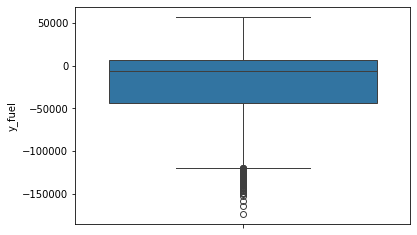

In [ ]:
sns.boxplot(datas['y_fuel'])

<Figure size 576x432 with 0 Axes>

(array([  16.,   48.,   25.,    3.,   20.,  270.,  757., 1103.,  297.,
          29.]),
 array([-348097.77374416, -308399.47284374, -268701.17194332,
        -229002.8710429 , -189304.57014248, -149606.26924206,
        -109907.96834164,  -70209.66744122,  -30511.3665408 ,
           9186.93435962,   48885.23526004]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution de la Variable Cible pour les accelerations')

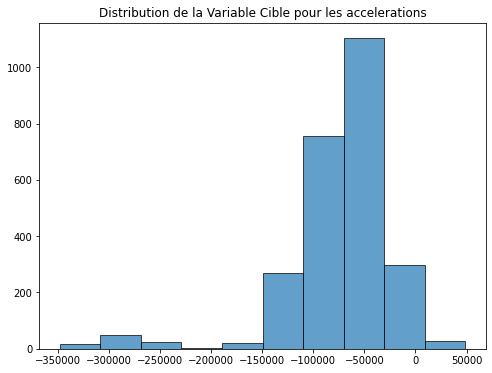

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(action_accelerate['y_fuel'], edgecolor='black', alpha=0.7)
plt.title('Distribution de la Variable Cible pour les accelerations')
# sns.distplot(np.array(datas['y_travel'].values), kde=True)
plt.show()

<AxesSubplot:ylabel='y_fuel'>

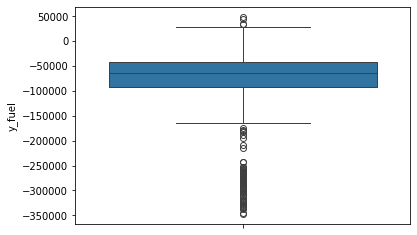

In [ ]:
sns.boxplot(action_accelerate['y_fuel'])

<Figure size 576x432 with 0 Axes>

(array([  9.,  42., 131., 321., 530., 437., 198.,  48.,  12.,   1.]),
 array([-35737.38122704, -26439.41257365, -17141.44392025,  -7843.47526686,
          1454.49338654,  10752.46203993,  20050.43069333,  29348.39934672,
         38646.36800012,  47944.33665351,  57242.30530691]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution de la Variable Cible pour les decelerations')

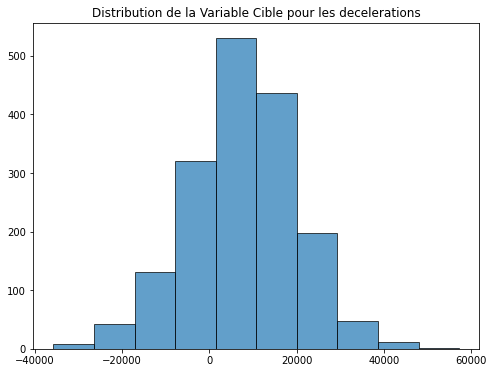

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(action_decelerate['y_fuel'], edgecolor='black', alpha=0.7)
plt.title('Distribution de la Variable Cible pour les decelerations')
# sns.distplot(np.array(datas['y_travel'].values), kde=True)
plt.show()

<Figure size 576x432 with 0 Axes>

(array([  3.,  20.,  79., 181., 398., 412., 348., 160.,  31.,   8.]),
 array([-38307.00001852, -31493.1955152 , -24679.39101189, -17865.58650857,
        -11051.78200526,  -4237.97750194,   2575.82700137,   9389.63150468,
         16203.436008  ,  23017.24051131,  29831.04501463]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution de la Variable Cible pour les stop')

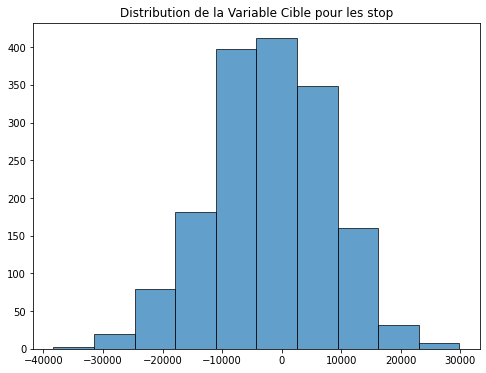

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(action_stop['y_fuel'], edgecolor='black', alpha=0.7)
plt.title('Distribution de la Variable Cible pour les stop')
# sns.distplot(np.array(datas['y_travel'].values), kde=True)
plt.show()

#### Deep Learning

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
import tensorflow.keras as tk

In [98]:
# X_train, X_test, y_train, y_test = train_test_split(X_travel, y_travel, test_size=0.2, random_state=42)
# # Standardiser les données
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

def nrmse(y_true, y_pred):
    """
    Calculate the Normalized Root Mean Square Error (NRMSE)
    """
    rms = K.sqrt(K.mean(K.square(y_pred - y_true)))
    nrmse = rms / (K.max(y_true) - K.min(y_true))
    return nrmse

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot )

# Créer le modèle de deep learning
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=nrmse, 
              metrics=[r2_score])

In [99]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entraîner le modèle
history = model.fit(X_train, y_train, 
                    epochs=100,
                    batch_size=16, 
                    validation_data= (X_test, y_test), 
                    verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
249/249 [==============================] - 3s 5ms/step - loss: 0.4292 - r2_score: -1.1642 - val_loss: 0.3417 - val_r2_score: -0.3857 - lr: 0.0010
Epoch 2/100
249/249 [==============================] - 1s 5ms/step - loss: 0.2899 - r2_score: -0.0429 - val_loss: 0.1870 - val_r2_score: 0.5792 - lr: 0.0010
Epoch 3/100
249/249 [==============================] - 1s 5ms/step - loss: 0.2012 - r2_score: 0.5034 - val_loss: 0.1458 - val_r2_score: 0.7506 - lr: 0.0010
Epoch 4/100
249/249 [==============================] - 1s 4ms/step - loss: 0.1882 - r2_score: 0.5413 - val_loss: 0.1395 - val_r2_score: 0.7661 - lr: 0.0010
Epoch 5/100
249/249 [==============================] - 1s 3ms/step - loss: 0.1813 - r2_score: 0.5982 - val_loss: 0.1351 - val_r2_score: 0.7820 - lr: 0.0010
Epoch 6/100
249/249 [==============================] - 1s 3ms/step - loss: 0.1791 - r2_score: 0.6148 - val_loss: 0.1353 - val_r2_score: 0.7814 - lr: 0.0010
Epoch 7/100
249/249 [==============================] - 1s 4ms

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Historique de la perte')

Text(0.5, 0, 'Épochs')

Text(0, 0.5, 'Loss')

<AxesSubplot:>

Text(0.5, 1.0, 'Historique du R² score')

Text(0.5, 0, 'Épochs')

Text(0, 0.5, 'R² score')

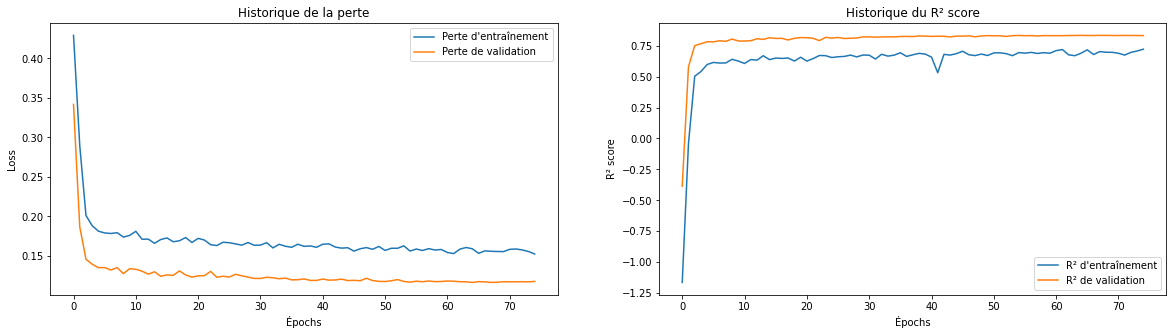

In [100]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Historique de la perte')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['r2_score'], label='R² d\'entraînement')
plt.plot(history.history['val_r2_score'], label='R² de validation')
plt.title('Historique du R² score')
plt.xlabel('Épochs')
plt.ylabel('R² score')
plt.legend()

plt.show()

In [101]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

125/125 [==============================] - 0s 3ms/step - loss: 0.1040 - r2_score: 0.8479


[0.10401782393455505, 0.847935140132904]

42/42 [==============================] - 0s 2ms/step - loss: 0.1060 - r2_score: 0.8459


[0.10595060884952545, 0.8458821177482605]

In [ ]:
y_test_pred = model.predict(X_test)

42/42 [==============================] - 0s 3ms/step


In [ ]:
sklearn.metrics.r2_score(y_test, y_test_pred)

0.8538221357133478

In [ ]:
import joblib
from keras.models import save_model

joblib.dump(scaler, 'scaler_travel.pkl')

model.save('model_travel.h5')

['scaler_travel.pkl']